In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from matplotlib import pyplot as plt
# Style of plots
plt.style.use('fivethirtyeight')

In [103]:
def regression_model(model, df1, df2, name):
    x = df1[['FinMes','AntesFeriados','DespuesFeriados','AnoNuevo','Navidad','SemanaSanta','FiestasPatrias','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]
    y = df1[["Venta"]]
    model.fit(x,y)
    x_test = df2[['FinMes','AntesFeriados','DespuesFeriados','AnoNuevo','Navidad','SemanaSanta','FiestasPatrias','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]
    y_test = df2[["Venta"]]
    predictions = model.predict(x_test)
    pred = predictions.ravel()
    return  pred

In [104]:
#import and create date
croston_fit= pd.read_csv('croston_fit.csv', sep=',',decimal='.')
test_array= pd.read_csv('test_array.csv', sep=',',decimal='.')
demand= pd.read_csv('Fits_Test_Eduards_demand_dss.csv', sep=';',decimal='.')
df= pd.read_csv('datos_de_prueba.csv', sep=';',decimal=',')
df_1 =(df[df["Fecha"] < '2019-06-28 '])
df_2 = (df[df["Fecha"]>= '2019-06-28 '])
df_2 = (df_2[df_2["Fecha"]<='2019-08-31 '])
clf1 = svm.SVR()
clf2 = tree.DecisionTreeRegressor()
clf3 = GaussianNB()
clf4 = LogisticRegression()
clf5 = KNeighborsClassifier()
clf6 = LinearDiscriminantAnalysis()

In [105]:
fit_SVM = regression_model(clf1, df_1, df_2, "SVM")
fit_Decision_Tree = regression_model(clf2, df_1, df_2, "Decision Tree")
fit_GaussianNB = regression_model(clf3, df_1, df_2, "GaussianNB")
fit_Logistic_Regression = regression_model(clf4, df_1, df_2, "Logistic Regression")
fit_KNeighborsClassifier = regression_model(clf5, df_1, df_2, "KNN")
fit_LinearDiscriminantAnalysis = regression_model(clf6, df_1, df_2, "LDA")
results_models = pd.DataFrame({ 'fecha':df_2["Fecha"],
                               'y_test':df_2["Venta"], 
                               'demand_DSS':demand.Fit.values,
                               'fit_SVM':fit_SVM,
                               'fit_Decision_Tree':fit_Decision_Tree,
                               'fit_GaussianNB':fit_GaussianNB,
                               'fit_Logistic_Regression':fit_Logistic_Regression, 
                               'sarima':test_array.pred.values, 
                               'fit_KNeighborsClassifier':fit_KNeighborsClassifier, 
                               'fit_LinearDiscriminantAnalysis':fit_LinearDiscriminantAnalysis,
                               'fit_croston':croston_fit["croston_forecast"].values})
results_models['fecha']= pd.to_datetime(results_models['fecha']) 
results_models.set_index('fecha', inplace=True)
results_models.to_csv('results_models.csv')

C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d ar

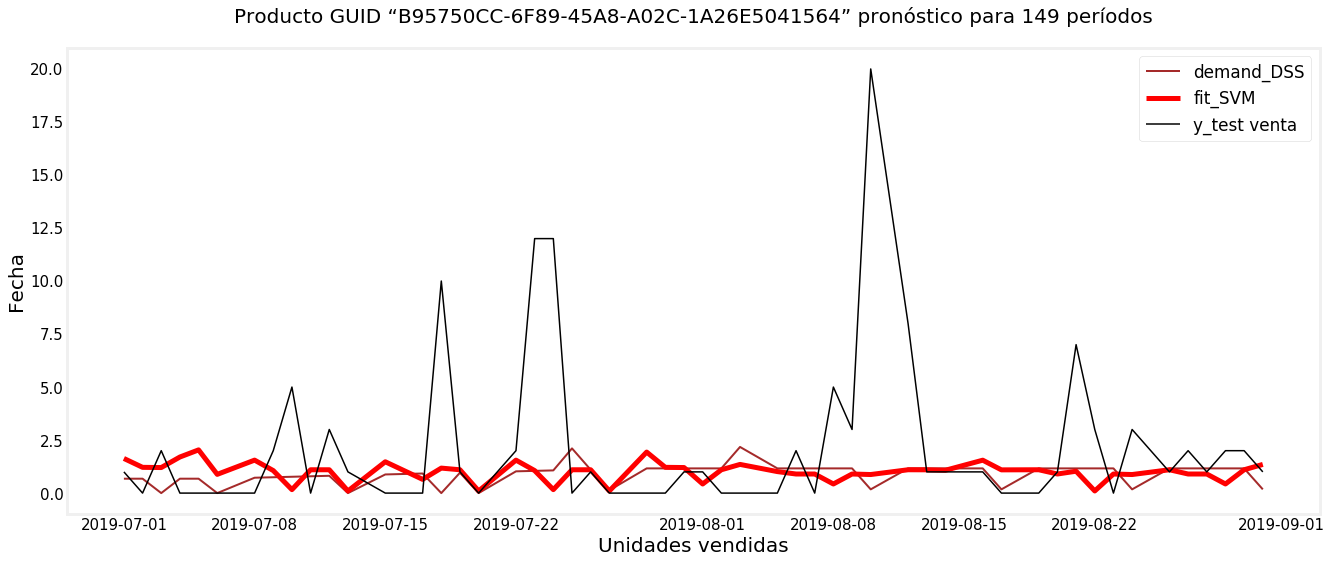

In [112]:
#plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=5.0,color ="red")
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2.0,color ="brown")
plt.plot(  results_models.fit_SVM, label='fit_SVM' ,linewidth=5.0,color ="red")
plt.plot( results_models.y_test, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

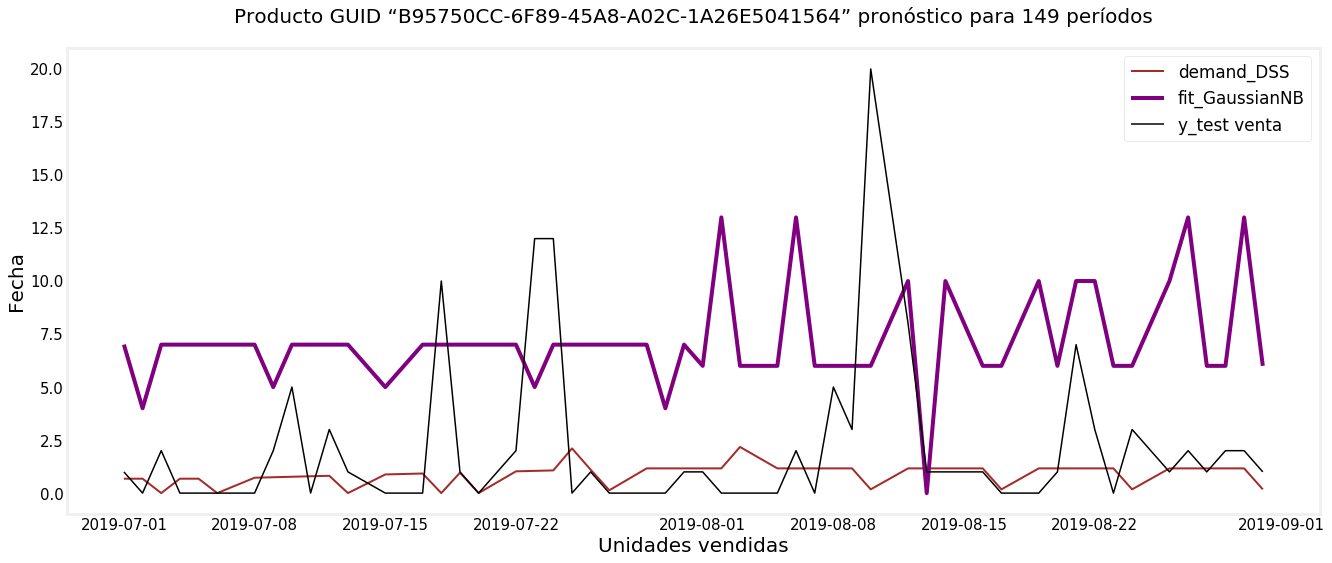

In [107]:
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2,color ="brown")
plt.plot(  results_models.fit_GaussianNB, label='fit_GaussianNB' ,linewidth=4.0,color ="Purple")
plt.plot( results_models.y_test, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

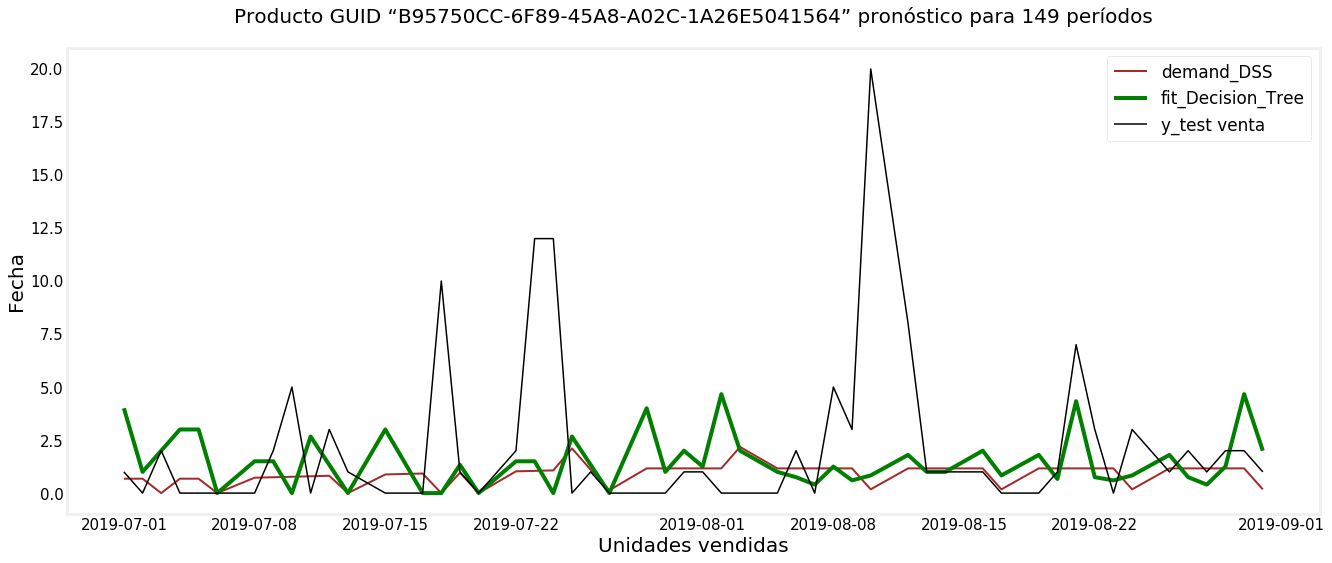

In [108]:
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2,color ="brown")
plt.plot(  results_models.fit_Decision_Tree, label='fit_Decision_Tree' ,linewidth=4.0,color ="green")
plt.plot( results_models.y_test, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show()

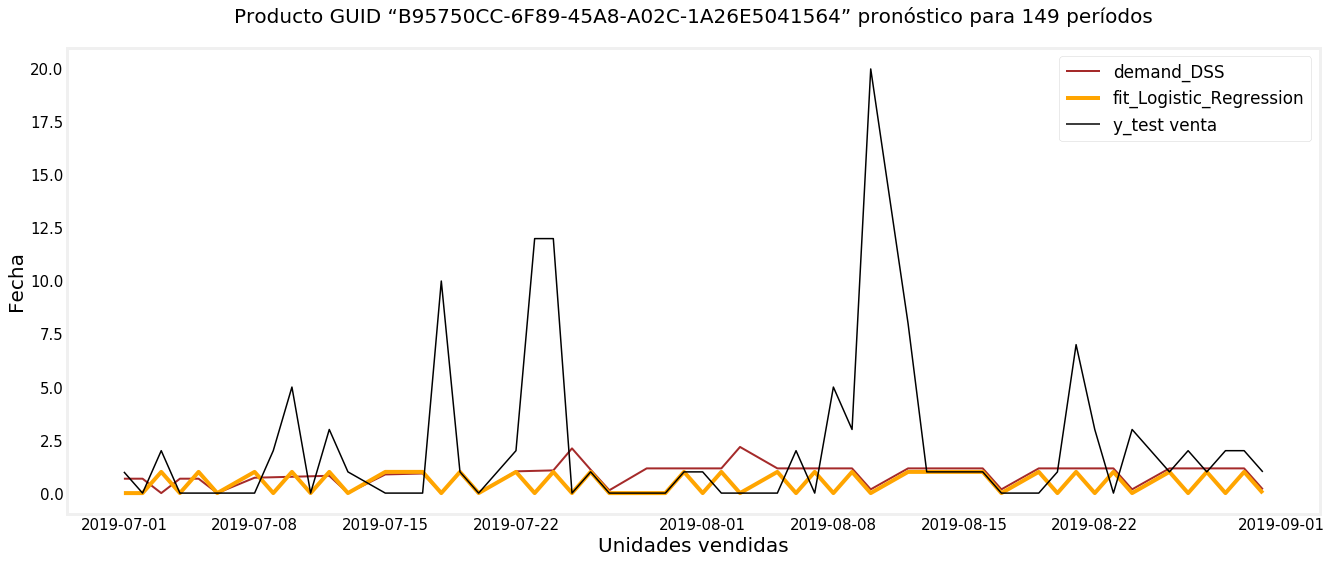

In [109]:
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2,color ="brown")
plt.plot( results_models.fit_Logistic_Regression, label='fit_Logistic_Regression' ,linewidth=4.0,color ="orange")
plt.plot( results_models.y_test, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

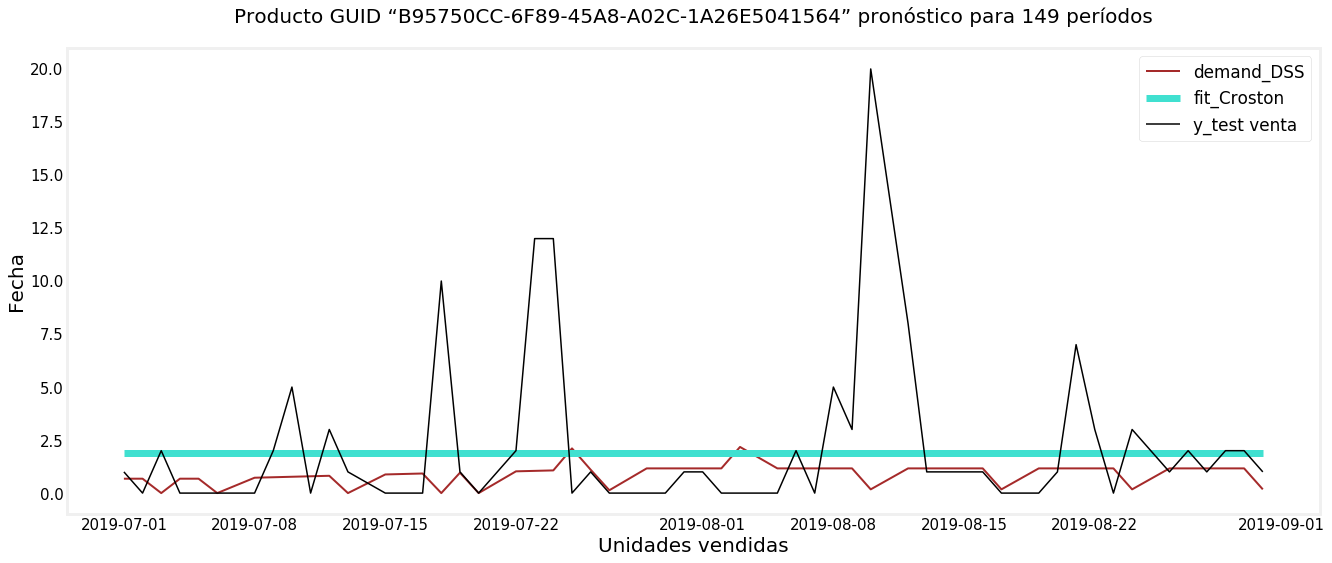

In [110]:
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2,color ="brown")
plt.plot( results_models.fit_croston, label='fit_Croston' ,linewidth=7.0,color ="turquoise")
plt.plot(results_models.y_test, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

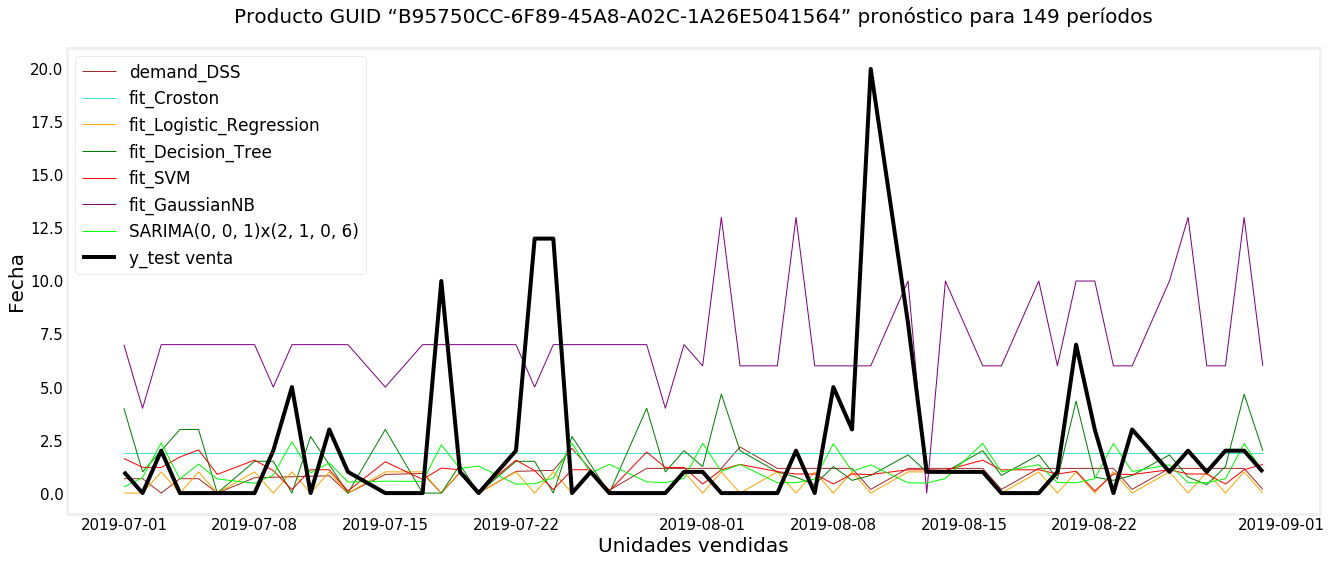

In [111]:
#plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=1,color ="brown")
plt.plot( results_models.fit_croston, label='fit_Croston' ,linewidth=1,color ="turquoise")
plt.plot( results_models.fit_Logistic_Regression, label='fit_Logistic_Regression' ,linewidth=1,color ="orange")
plt.plot(  results_models.fit_Decision_Tree, label='fit_Decision_Tree' ,linewidth=1,color ="green")
plt.plot(  results_models.fit_SVM, label='fit_SVM' ,linewidth=1,color ="red")
plt.plot(  results_models.fit_GaussianNB, label='fit_GaussianNB' ,linewidth=1,color ="Purple")
plt.plot( results_models.sarima, label='SARIMA(0, 0, 1)x(2, 1, 0, 6)' ,linewidth=1,color ="lime")
plt.plot(results_models.y_test, color ="black", label='y_test venta',linewidth=4)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()